### Importación de datos



In [33]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


Después del anális la recomendación sería que vendiera la tienda 4 que es la que tiene menos venta en monto, en artículos y en su calíficación de satisfacción del cliente se encuentra en el tercer lugar.

Algunas consideraciones adicionales:
*   Mejorar la atención en la tienda 1, aunque es la que más vende es la que salió con peor calificación del cliente.
*   Revisar el costo promedio de envio de la tienda 1, es la de mayor costo de envio de las 4. Lo mejor sería estandarizar en lo que se pueda el costo de envio en todas las tiendas.
*  En la tienda 2 se tendria que incentivar la venta en la categoría de muebles para lograr que llegue entre las categorias de Electrónicos, Electrodomésticos y Muebles al 85% como las demas tiendas.




#1. Análisis de facturación



De acuerdo con las ventas de las cuatro tiendas:
*   La tienda 1 vende el 26.1% de la venta total
*   La tienda 2 vende el 25.4% de la venta total
*   La tienda 3 vende el 24.9% de la venta total
*   La tienda 4 vende el 23.6% de la venta total

Por lo que la tienda 4 es la que menos vende de las cuatro.

Adicionalmente obtuve la cantidad de artículos vendidos por tienda obtendiendo:
*   La tienda 1 vende el 25.14% de los artículos totales
*   La tienda 2 vende el 24.79% de los artículos totales
*   La tienda 3 vende el 25.35% de los artículos totales
*   La tienda 4 vende el 24.72% de los artículos totales

Por lo que la tienda 4 es la que vende menos artículos.

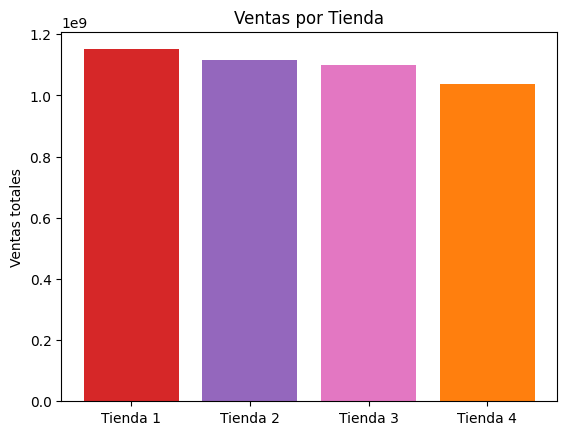

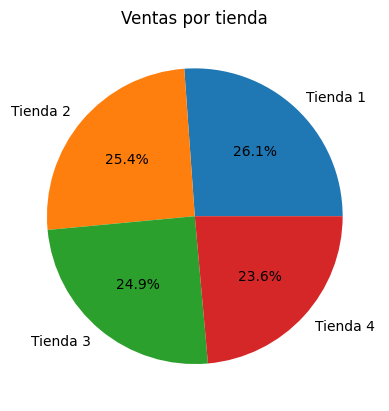

In [37]:

venta1 = round(tienda['Precio'].sum(),2)
venta2 = round(tienda2['Precio'].sum(),2)
venta3 = round(tienda3['Precio'].sum(),2)
venta4 = round(tienda4['Precio'].sum(),2)

cantidad1 = round(tienda1['Cantidad de cuotas'].sum(), 2)
cantidad2 = round(tienda2['Cantidad de cuotas'].sum(), 2)
cantidad3 = round(tienda3['Cantidad de cuotas'].sum(), 2)
cantidad4 = round(tienda4['Cantidad de cuotas'].sum(), 2)
print(cantidad1, cantidad2, cantidad3, cantidad4)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ventas = [venta1, venta2, venta3, venta4]
bar_colors = ['tab:red', 'tab:purple', 'tab:pink', 'tab:orange']

ax.bar(tiendas, ventas, color=bar_colors)
ax.set_ylabel('Ventas totales')
ax.set_title('Ventas por Tienda')

plt.show()

plt.pie(ventas, labels=tiendas,autopct='%1.1f%%')
plt.title('Ventas por tienda')
plt.show()


# 2. Ventas por categoría

Las categorías de Electrónicos, Electrodomésticos y Muebles en las tiendas representan aproximadamente el 85% del total de las ventas con excepción de la tienda 2 que representa un 83.8%.

La tienda 2 en comparación con las restantes tiene menor porcentaje de venta en la categoría de Muebles.

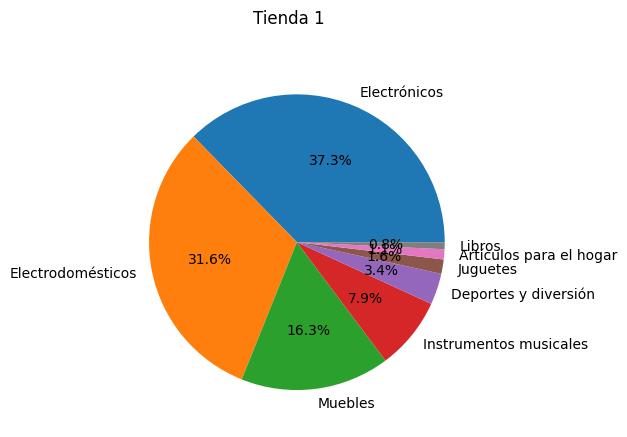

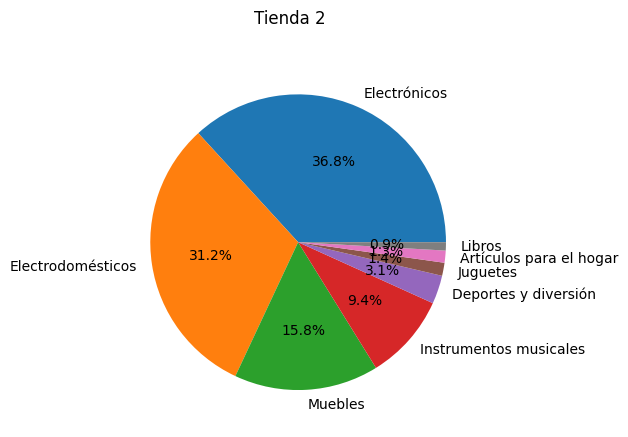

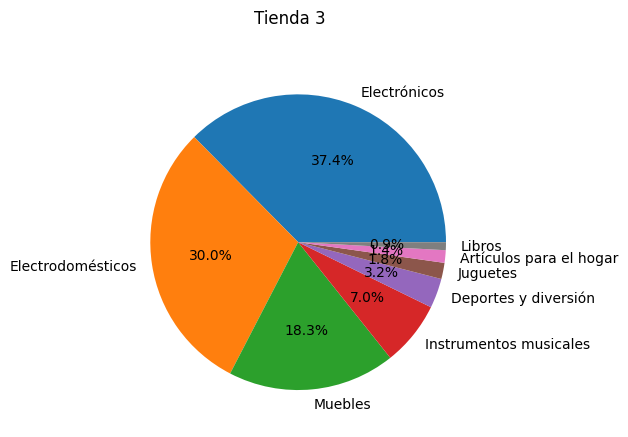

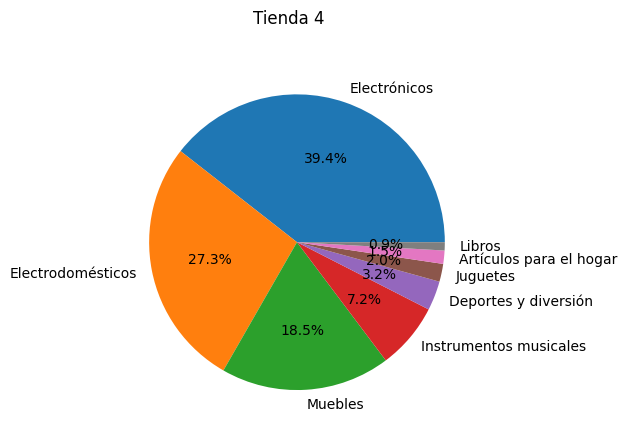

In [20]:
ventas_categoria_tienda1 = tienda.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
ventas_categoria_tienda2 = tienda2.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
ventas_categoria_tienda3 = tienda3.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
ventas_categoria_tienda4 = tienda4.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)

import matplotlib.pyplot as plt
ventas_categorias = {'Tienda 1': ventas_categoria_tienda1,
                      'Tienda 2': ventas_categoria_tienda2,
                      'Tienda 3':ventas_categoria_tienda3,
                     'Tienda 4': ventas_categoria_tienda4}
for tienda, ventas_categoria in ventas_categorias.items():
  labels = ventas_categoria.index
  sizes = list(ventas_categoria)
  fig, ax = plt.subplots()
  ax.pie(sizes, labels=labels, autopct='%1.1f%%')
  fig.suptitle(tienda)
  plt.show()



# 3. Calificación promedio de la tienda


El promedio por calificación de las tiendas de acuerdo a los clientes fue:
*   3.98 para la tienda 1
*   4.04 para la tienda 2
*   4.05 para la tienda 3
*   4.00 para la tienda 4

La mejor calificada fue la tienda 3 mientras que la peor calificada fue la tienda 1. La calificación más alta es cinco.

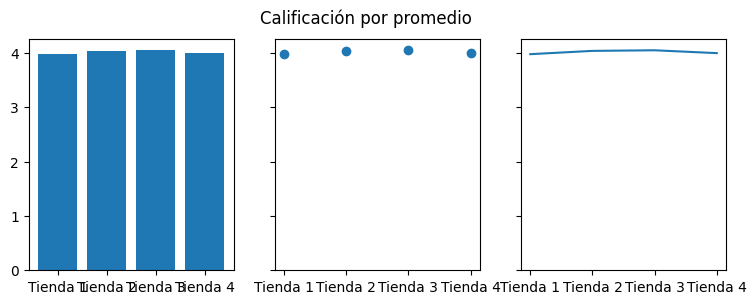

In [9]:
promedio1 = tienda['Calificación'].mean()
promedio2 = tienda2['Calificación'].mean()
promedio3 = tienda3['Calificación'].mean()
promedio4 = tienda4['Calificación'].mean()

import matplotlib.pyplot as plt

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones = [promedio1, promedio2, promedio3, promedio4]

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(tiendas, calificaciones)
axs[1].scatter(tiendas, calificaciones)
axs[2].plot(tiendas, calificaciones)
fig.suptitle('Calificación por promedio')
plt.show()

# 4. Productos más y menos vendidos

Los productos más y menos vendidos por tienda varian mucho.

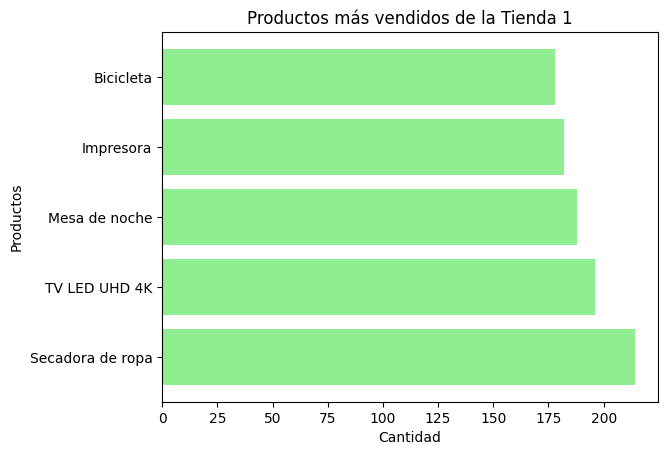

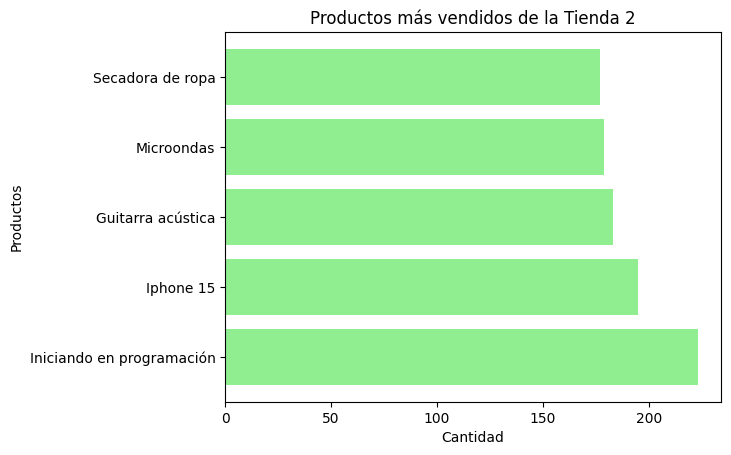

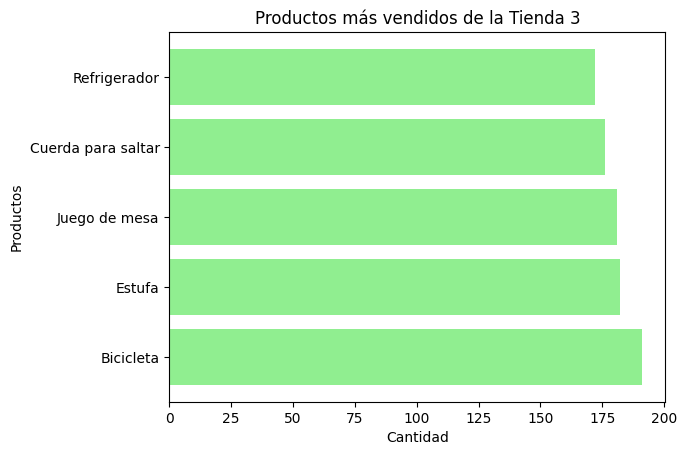

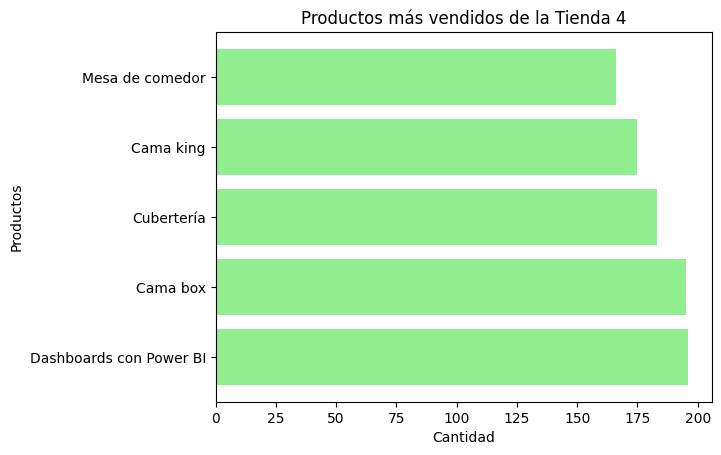

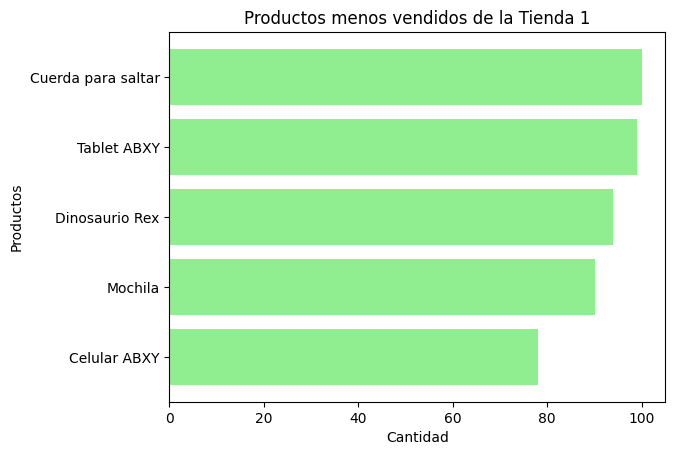

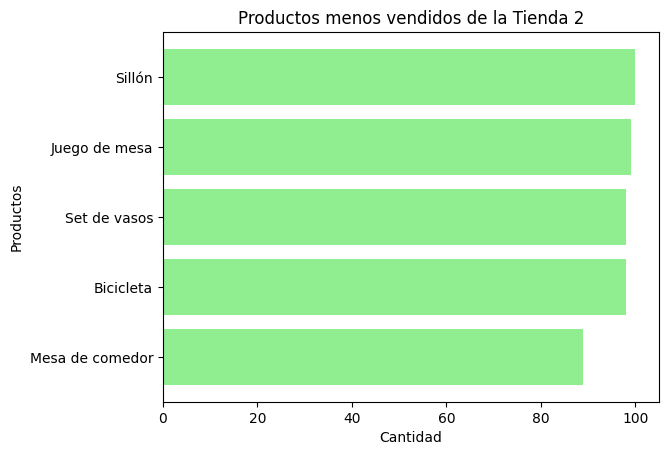

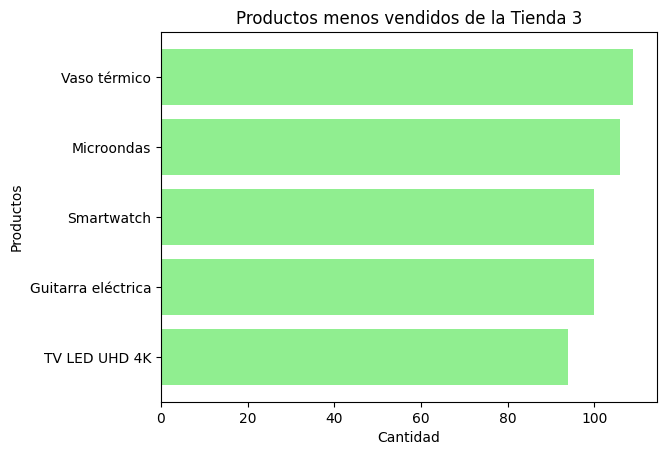

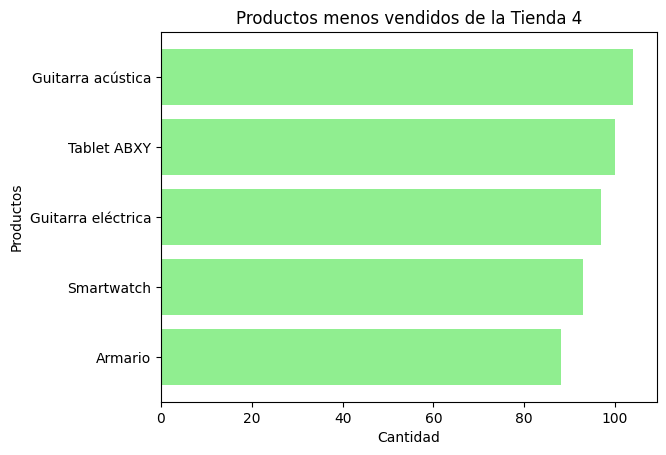

In [29]:
mas_vendido_tienda1 = tienda.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).head(5)
mas_vendido_tienda2 = tienda2.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).head(5)
mas_vendido_tienda3 = tienda3.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).head(5)
mas_vendido_tienda4 = tienda4.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).head(5)

menos_vendido_tienda1 = tienda.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=True).head(5)
menos_vendido_tienda2 = tienda2.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=True).head(5)
menos_vendido_tienda3 = tienda3.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=True).head(5)
menos_vendido_tienda4 = tienda4.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=True).head(5)

import matplotlib.pyplot as plt

mas_vendidos = {'Tienda 1': mas_vendido_tienda1, 'Tienda 2': mas_vendido_tienda2, 'Tienda 3': mas_vendido_tienda3, 'Tienda 4': mas_vendido_tienda4}
for tienda, mas_vendido in mas_vendidos.items():
  productos = mas_vendido.index
  cantidades = list(mas_vendido)
  plt.barh(productos, cantidades, color='lightgreen')
  plt.xlabel('Cantidad')
  plt.ylabel('Productos')
  plt.title('Productos más vendidos de la ' + tienda)
  plt.show()

menos_vendidos = {'Tienda 1': menos_vendido_tienda1, 'Tienda 2': menos_vendido_tienda2, 'Tienda 3': menos_vendido_tienda3, 'Tienda 4': menos_vendido_tienda4}
for tienda, menos_vendido in menos_vendidos.items():
  productos = menos_vendido.index
  cantidades = list(menos_vendido)
  plt.barh(productos, cantidades, color='lightgreen')
  plt.xlabel('Cantidad')
  plt.ylabel('Productos')
  plt.title('Productos menos vendidos de la ' + tienda)
  plt.show()


# 5. Envío promedio por tienda

El promedio del costo por envio por tienda fue:
*   26,018.61 para la tienda 1
*   25,216.24 para la tienda 2
*   24,805.68 para la tienda 3
*   23,459.46 para la tienda 4

Por lo que la tienda 1 es la que tiene mayor promedio en su costo de envio.


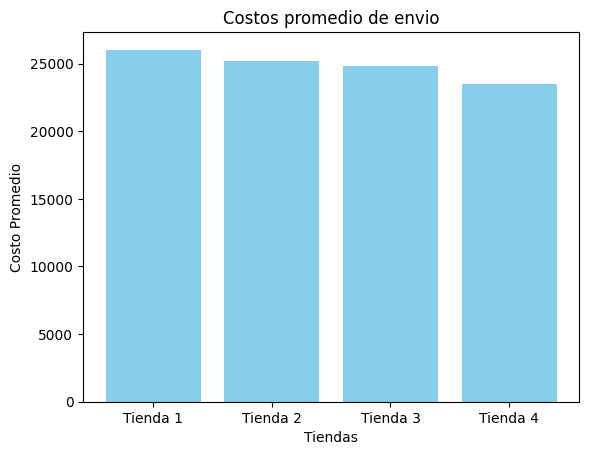

In [34]:
costo_p1 = tienda['Costo de envío'].mean()
costo_p2 = tienda2['Costo de envío'].mean()
costo_p3 = tienda3['Costo de envío'].mean()
costo_p4 = tienda4['Costo de envío'].mean()
costos_promedio = [costo_p1, costo_p2,costo_p3, costo_p4]

import matplotlib.pyplot as plt
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
plt.bar(tiendas, costos_promedio, color='skyblue')
plt.xlabel('Tiendas')
plt.ylabel('Costo Promedio')
plt.title('Costos promedio de envio')
plt.show()